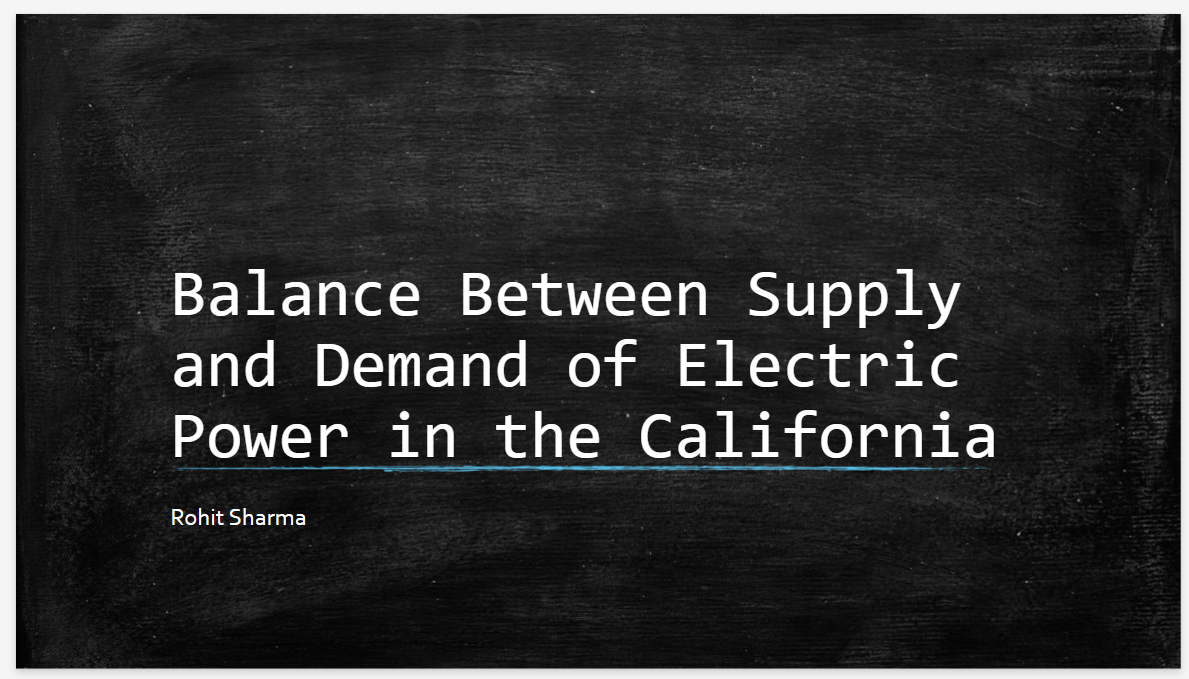

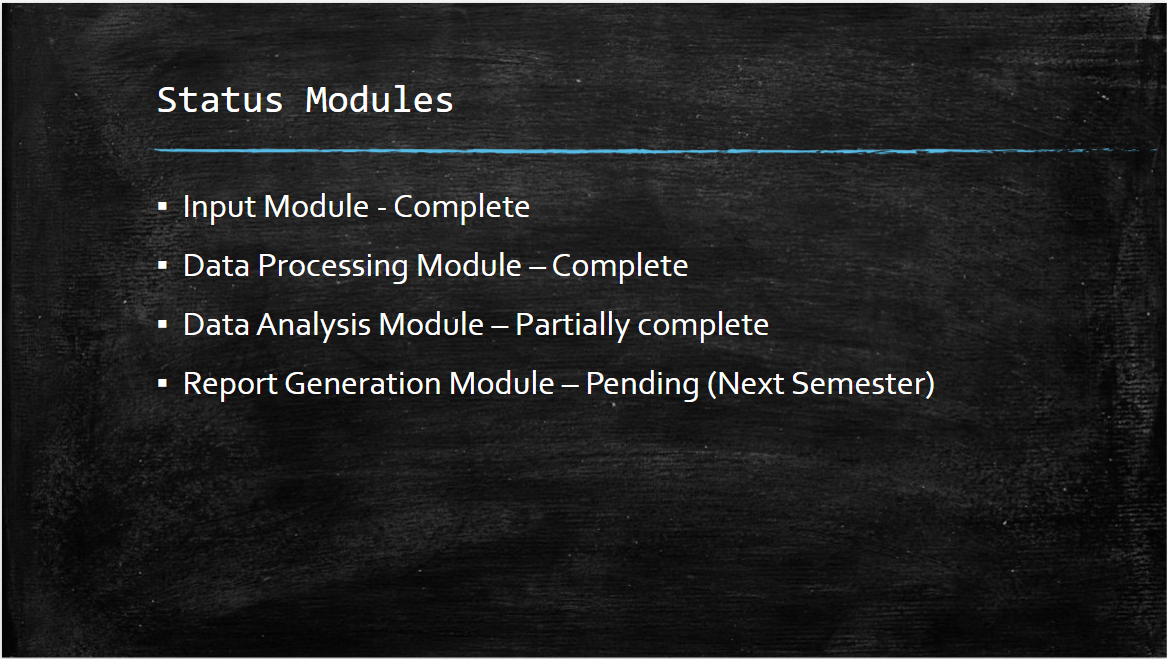

In [28]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fpdf import FPDF
from datetime import datetime
import os
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import numpy as np

In [29]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [30]:
prod_2021=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2021.xlsx', sheet_name=1)
prod_2022=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2022.xlsx', sheet_name=1)
prod_2023=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2023.xlsx', sheet_name=1)
prod_2024=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2024.xlsx', sheet_name=1)
prod_2025=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2025.xlsx', sheet_name=1)

In [31]:
curtail_2021=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2021.xlsx', sheet_name=2)
curtail_2022=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2022.xlsx', sheet_name=2)
curtail_2023=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2023.xlsx', sheet_name=2)
curtail_2024=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2024.xlsx', sheet_name=2)
curtail_2025=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2025.xlsx', sheet_name=2)

# Input Module

In [32]:
#User input to view data Yearly (2021, 2022, 2023, 2024 and 2025), Monthly (Jan- Dec) 
# Also the format of the report either .pdf or .html

#Function to check valid years from the user
def years(periodrange):
        years_list = periodrange
        if all(year in {'2021', '2022', '2023', '2024', '2025'} for year in years_list):
            validyear=True
            return
        else:
            print('Invalid Year(s) entered! Please enter again.')

#Function to check valid months from the user
def months(periodyear, periodmonth):

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    if periodyear in {'2021', '2022', '2023', '2024', '2025'}:
        if all(month in months for month in periodmonth):
            validyear=True
            validmonth=True
 
        else:
            print("Invalid Month(s) entered! Please enter again.")




In [ ]:
# Main Program Flow
data_period = input("Choose Period (Yearly or Monthly): ").strip().lower()

selected_years = ''
#while selected_years != 'end':
if data_period=='yearly':
    selected_years = input(f"Choose Years (2021,2022,2023,2024,2025) separated by ';' or Type 'end' to exit: ").strip().title().split(';')
    years(selected_years)

elif data_period=='monthly':
    selected_year = input("Choose Year (2021,2022,2023,2024,2025) or \n Type 'end' to exit: ").strip()
    selected_months = input(f"Choose Months (e.g., Jan, Feb, ... , Dec) separated by ';' : ").strip().title().split(';')
    months(selected_year,selected_months)


# Data Processing Module

In [ ]:
prod_2021['Date_t']=prod_2021['Date'].dt.date
curtail_2021['Date_t']=curtail_2021['Date'].dt.date
prod_2022['Date_t']=prod_2022['Date'].dt.date
curtail_2022['Date_t']=curtail_2022['Date'].dt.date
prod_2023['Date_t']=prod_2023['Date'].dt.date
curtail_2023['Date_t']=curtail_2023['Date'].dt.date
prod_2024['Date_t']=prod_2024['Date'].dt.date
curtail_2024['Date_t']=curtail_2024['Date'].dt.date
prod_2025['Date_t']=prod_2025['Date'].dt.date
curtail_2025['Date_t']=curtail_2025['Date'].dt.date

In [ ]:
data_2021=pd.merge(prod_2021,curtail_2021, on=["Date_t","Hour","Interval"],indicator=True, how='outer')
data_2022=pd.merge(prod_2022,curtail_2022, on=["Date_t","Hour","Interval"],indicator=True, how='outer')
data_2023=pd.merge(prod_2023,curtail_2023, on=["Date_t","Hour","Interval"],indicator=True, how='outer')
data_2024=pd.merge(prod_2024,curtail_2024, on=["Date_t","Hour","Interval"],indicator=True, how='outer')
data_2025=pd.merge(prod_2025,curtail_2025, on=["Date_t","Hour","Interval"],indicator=True, how='outer')


In [ ]:
data_2021=data_2021.drop(['Date_y','_merge','Date_t'], axis=1)
data_2022=data_2022.drop(['Date_y','_merge','Date_t'], axis=1)
data_2023=data_2023.drop(['Date_y','_merge','Date_t'], axis=1)
data_2024=data_2024.drop(['Date_y','_merge','Date_t'], axis=1)
data_2025=data_2025.drop(['Date_y','_merge','Date_t'], axis=1)

In [ ]:
data_2021.fillna(0,inplace=True)
data_2022.fillna(0,inplace=True)
data_2023.fillna(0,inplace=True)
data_2024.fillna(0,inplace=True)
data_2025.fillna(0,inplace=True)

In [ ]:
data_2021.head()

In [ ]:
data_2021.isnull().sum()

In [ ]:
big_data=pd.concat([data_2021,data_2022,data_2023,data_2024,data_2024])

In [ ]:
big_data.to_csv('bigData.csv',header=True, index =True)

In [ ]:
big_data=big_data.drop(['Reason'],axis=1)


In [ ]:
big_data.info()

In [ ]:
big_data['Month']=big_data['Date_x'].dt.month_name()
big_data['Year']=big_data['Date_x'].dt.year
big_data['Day']=big_data['Date_x'].dt.day


In [ ]:
big_data.head(5)


In [ ]:
selected_years

# Data Analysis Module

In [ ]:
def df_monthly(df_year):
    data_month=df_year.copy()
    data_month['Month']=df_year['Date_x'].dt.month
    df_byMonth=pd.pivot_table(data_month, values=[ 'Solar', 'Wind','Nuclear', 'Large Hydro', 'Imports','Thermal'],index=data_month.Month)
    mon=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
    df_byMonth['Month']=mon
    df_byMonth=df_byMonth.set_index('Month')
    
    df_byMonth.plot(kind='bar', stacked=True)
    yearly_chart_path = "yearly_chart.png"
    plt.xlabel(f'Months')
    plt.ylabel('Power MW')
    plt.tight_layout() 
    plt.savefig(yearly_chart_path)  
    plt.close()  
    
    return df_byMonth

In [ ]:
test_month=df_monthly(data_2021)
test_month.plot(kind='bar', stacked=True)

plt.xlabel(f'Months 2021')
plt.ylabel('Power MW')



In [ ]:
def pattern_finder(df):
    df2=df.copy()
    for col in df2.columns:
        avg=df2[col].mean()
        sd=df2[col].std()
        df2[col]=df2[col].apply(lambda x: (x-avg)/sd)
        
    kmeans=KMeans(n_clusters=3, n_init='auto')
    kmeans.fit(df2)
    df2['cluster']=kmeans.labels_
    df2.cluster.value_counts()
    centroids = kmeans.cluster_centers_
    
    plt.scatter(x=df2['Load'], y=df2['Thermal'], c=df2['cluster'], cmap='rainbow')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50, cmap='rainbow')
    plt.xlabel('Load /n 2021')
    plt.ylabel('Thermal')

   
    scatter_chart_path = "scatter_plot.png"
    plt.tight_layout() 
    plt.savefig(scatter_chart_path)
    plt.close()  
    
    return df2, centroids
    
    

In [ ]:
test_pattern, test_centroids=pattern_finder(data_2021)
plt.scatter(x=test_pattern['Load'], y=test_pattern['Thermal'], c=test_pattern['cluster'], cmap='rainbow')
plt.scatter(test_centroids[:, 0], test_centroids[:, 1], c='green', s=50, cmap='rainbow')
plt.xlabel('Load')
plt.ylabel('Thermal\n 2021')

In [ ]:
#For Yearly Data report
data_year=big_data.copy()
df_data_year=pd.pivot_table(data_year, values=[ 'Solar', 'Wind','Nuclear', 'Large Hydro', 'Imports','Thermal','Net Load'],index=data_year.Year)

# Data
labels = selected_years
cat1 = df_data_year['Nuclear']
cat2 = df_data_year[ 'Thermal']
cat3 = df_data_year['Large Hydro']
cat4 = df_data_year[ 'Solar']
cat5 = df_data_year['Wind']
cat6 = df_data_year['Imports']
cat7 =df_data_year['Net Load']

#cat2 = [4, 2, 5]
#total = [10, 12, 9]

fig = go.Figure()

# Group 1: Stacked bars (Cat 1 + Cat 2)
fig.add_trace(go.Bar(
    x=labels,
    y=cat1,
    name=cat1.name,
    offsetgroup=0,
    base=None
))
fig.add_trace(go.Bar(
    x=labels,
    y=cat2,
    name=cat2.name,
    offsetgroup=0,
    base=np.array(cat1)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat3,
    name=cat3.name,
    offsetgroup=0,
    base=np.array(cat1)+np.array(cat2)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat4,
    name=cat4.name,
    offsetgroup=0,
    base=np.array(cat1)+np.array(cat2)+np.array(cat3)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat5,
    name=cat5.name,
    offsetgroup=0,
    base=np.array(cat1)+np.array(cat2)+np.array(cat3)+np.array(cat4)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat6,
    name=cat6.name,
    offsetgroup=0,
    base=np.array(cat1)+np.array(cat2)+np.array(cat3)+np.array(cat4)+ np.array(cat5)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat7,
    name=cat7.name,
    offsetgroup=1,  # Different group
    marker_color='gray'
))


fig.update_layout(
    title='California State Power Balance',
    barmode='group',  
    xaxis_title='Year',
    yaxis_title='MW',
    bargap=0.2,
)

fig.show()

# Report Generation Module